<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z04_F_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [29]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

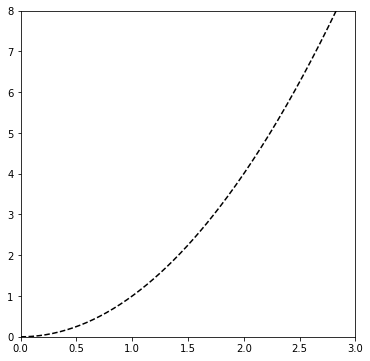

In [30]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

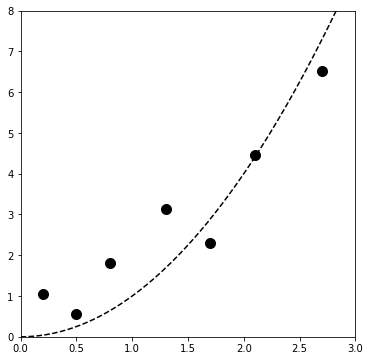

In [31]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [32]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.37103416]
-0.6528662858856484


Definiujemy naszą funkcję regresji

In [33]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

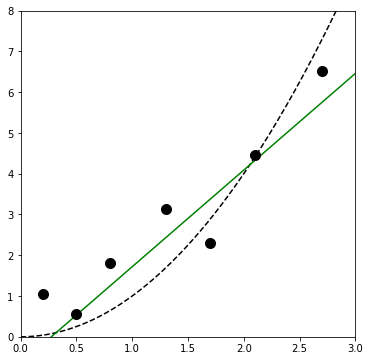

In [34]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [35]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

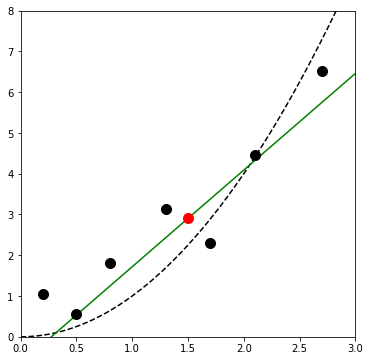

In [36]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [37]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.747609982023827
0.6624041625381494


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [47]:
deg=1
xx=np.vander(x, deg + 1)
print(xx)
params = np.linalg.solve( np.dot(np.transpose(xx),xx),np.transpose(xx)*y)

b, a = params 

print(a)
print(b)

[[0.2 1. ]
 [0.5 1. ]
 [0.8 1. ]
 [0.9 1. ]
 [1.3 1. ]
 [1.7 1. ]
 [2.1 1. ]
 [2.7 1. ]]
[ 0.15162914  3.34800845  0.18181623  0.13458711  0.13566777  0.03019598
 -0.1624105  -0.64013649]
[-0.08160267 -1.60662944 -0.07007116 -0.04567436  0.00570033  0.15097991
  0.31526743  0.76655   ]


# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [39]:
from scipy import optimize
f = lambda x,y: (x+1)**2+y**2
def fun (a):
    x, y = a
    return f(x,y)
    
optimize.fmin_cg(fun,np.array((0, 0)) )

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3


array([-1.00000001e+00, -7.45058060e-09])

# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [40]:
def compute_error(arguments):
    a,b = arguments
    return np.sum((y-(a*x+b))**2)

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [41]:
optimize.fmin_cg(compute_error,np.array((0, 0)) )

Optimization terminated successfully.
         Current function value: 9.517955
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6


array([ 2.37103417, -0.65286628])

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [42]:
def compute_error_1(arguments):
    a,b = arguments
    return np.sum(np.abs(y-(a*x+b)))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [43]:
optimize.fmin_cg(compute_error_1,np.array((0, 0)) )

         Current function value: 6.571884
         Iterations: 4
         Function evaluations: 70
         Gradient evaluations: 23


array([ 2.12970738, -0.06615148])

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


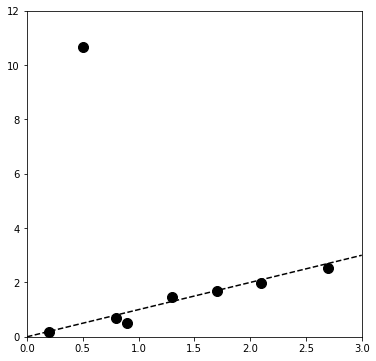

In [48]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [49]:
points = np.column_stack((x,y))

[-0.59119479]
3.2165558665246277


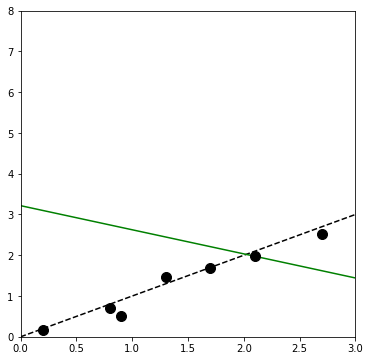

In [50]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)
f_lr = lambda x: lr.coef_ * x +lr.intercept_
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()